In [1]:
import pandas as pd

df = pd.read_csv('/Users/shreyamchaudhary/Downloads/twitter_sentiment.csv')

In [2]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df = df.iloc[:, [2, 3]].reset_index(drop=True)

In [4]:
df.columns = ['sentiment', 'text']

In [5]:
df.head()

,sentiment,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75681 non-null  object
 1   text       74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [7]:
print(df.shape)

(75681, 2)


In [8]:
df.isnull().sum()
df.dropna(inplace=True)

In [9]:
sum(df['text'].apply(len) > 5), sum(df['text'].apply(len) <= 5)

(72882, 2113)

In [10]:
print(df.shape)
df = df[df['text'].apply(len) > 5]
print(df.shape)

(74995, 2)
(72882, 2)


In [11]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20185
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

### Preprocessing preprocess_Kgptalkie Package

In [12]:
import preprocess_kgptalkie as ps

df.columns

Index(['sentiment', 'text'], dtype='object')

In [13]:
df = ps.get_basic_features(df)

In [14]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [15]:
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
1,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
2,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
3,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0
4,Positive,im getting into borderlands and i can murder y...,44,10,4.400000,5,0,0,1,0


/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a

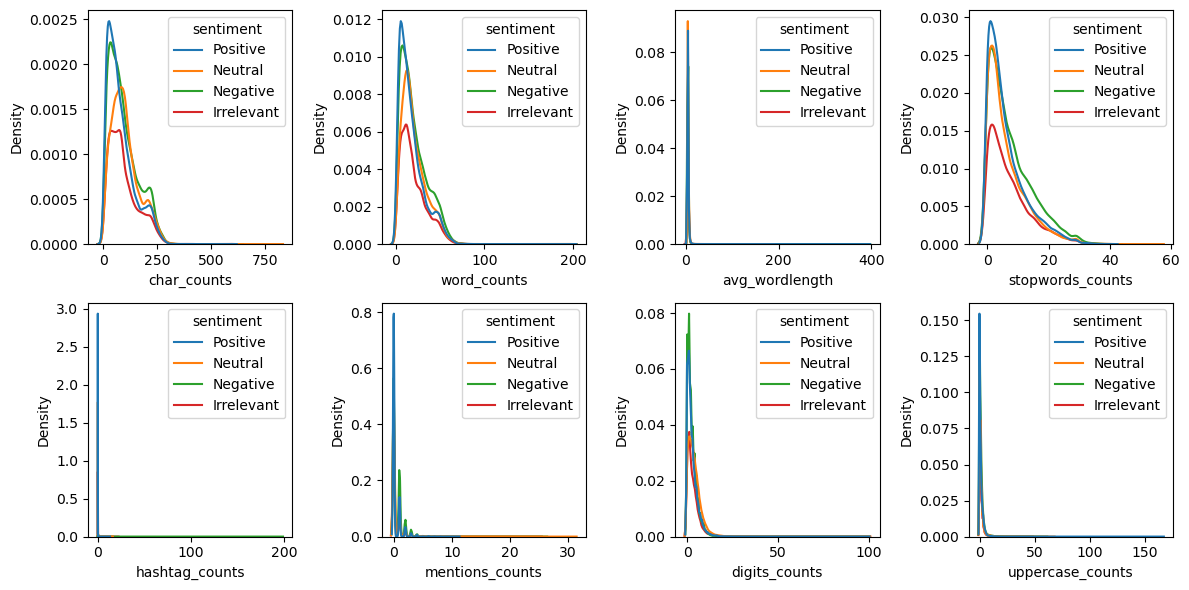

In [16]:
# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index+1) 
    sns.kdeplot(data=df, x = col, hue='sentiment', fill=False)
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

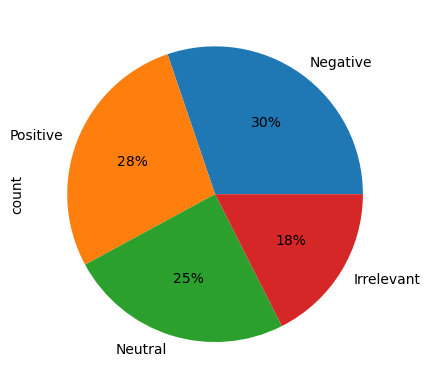

In [17]:
df['sentiment'].value_counts().plot(kind = 'pie', autopct = "%1.0f%%")

## Wordcloud visulization

In [18]:
from wordcloud import WordCloud, STOPWORDS

stopwods = list(STOPWORDS)

stopwods

["won't",
 "aren't",
 'did',
 'by',
 "shouldn't",
 "we'll",
 'hers',
 'other',
 "we'd",
 "he's",
 "they'll",
 'more',
 'she',
 'above',
 'been',
 'ours',
 'themselves',
 'to',
 'why',
 "we're",
 "doesn't",
 'else',
 'k',
 'until',
 'most',
 "you've",
 'their',
 'he',
 "what's",
 "you're",
 'who',
 'otherwise',
 'get',
 "why's",
 'however',
 'further',
 'also',
 "you'd",
 'whom',
 "don't",
 'www',
 'before',
 "hadn't",
 'each',
 'an',
 'ought',
 "mustn't",
 'hence',
 "they'd",
 'some',
 "that's",
 'under',
 'itself',
 'such',
 'which',
 'cannot',
 "didn't",
 "here's",
 "we've",
 'its',
 "he'd",
 'it',
 'just',
 'nor',
 "shan't",
 'so',
 'few',
 'than',
 'over',
 'in',
 'am',
 'what',
 "she'd",
 'at',
 "let's",
 'up',
 "couldn't",
 'is',
 'me',
 'therefore',
 "they're",
 'the',
 'has',
 'shall',
 'yours',
 'same',
 'himself',
 "he'll",
 'any',
 "i'd",
 "who's",
 'yourselves',
 'there',
 'from',
 'does',
 'again',
 'but',
 'ever',
 'be',
 'these',
 "they've",
 'when',
 'have',
 'do',
 'be

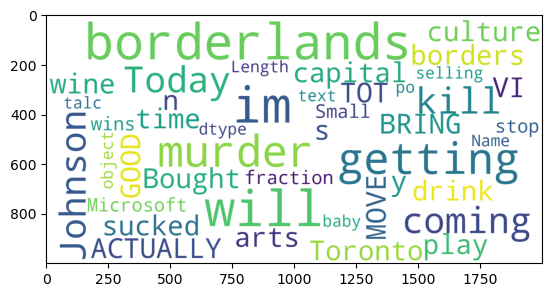

In [19]:
wordcloud = WordCloud(background_color='white', stopwords=stopwods, 
                      max_words=300, max_font_size=40, scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

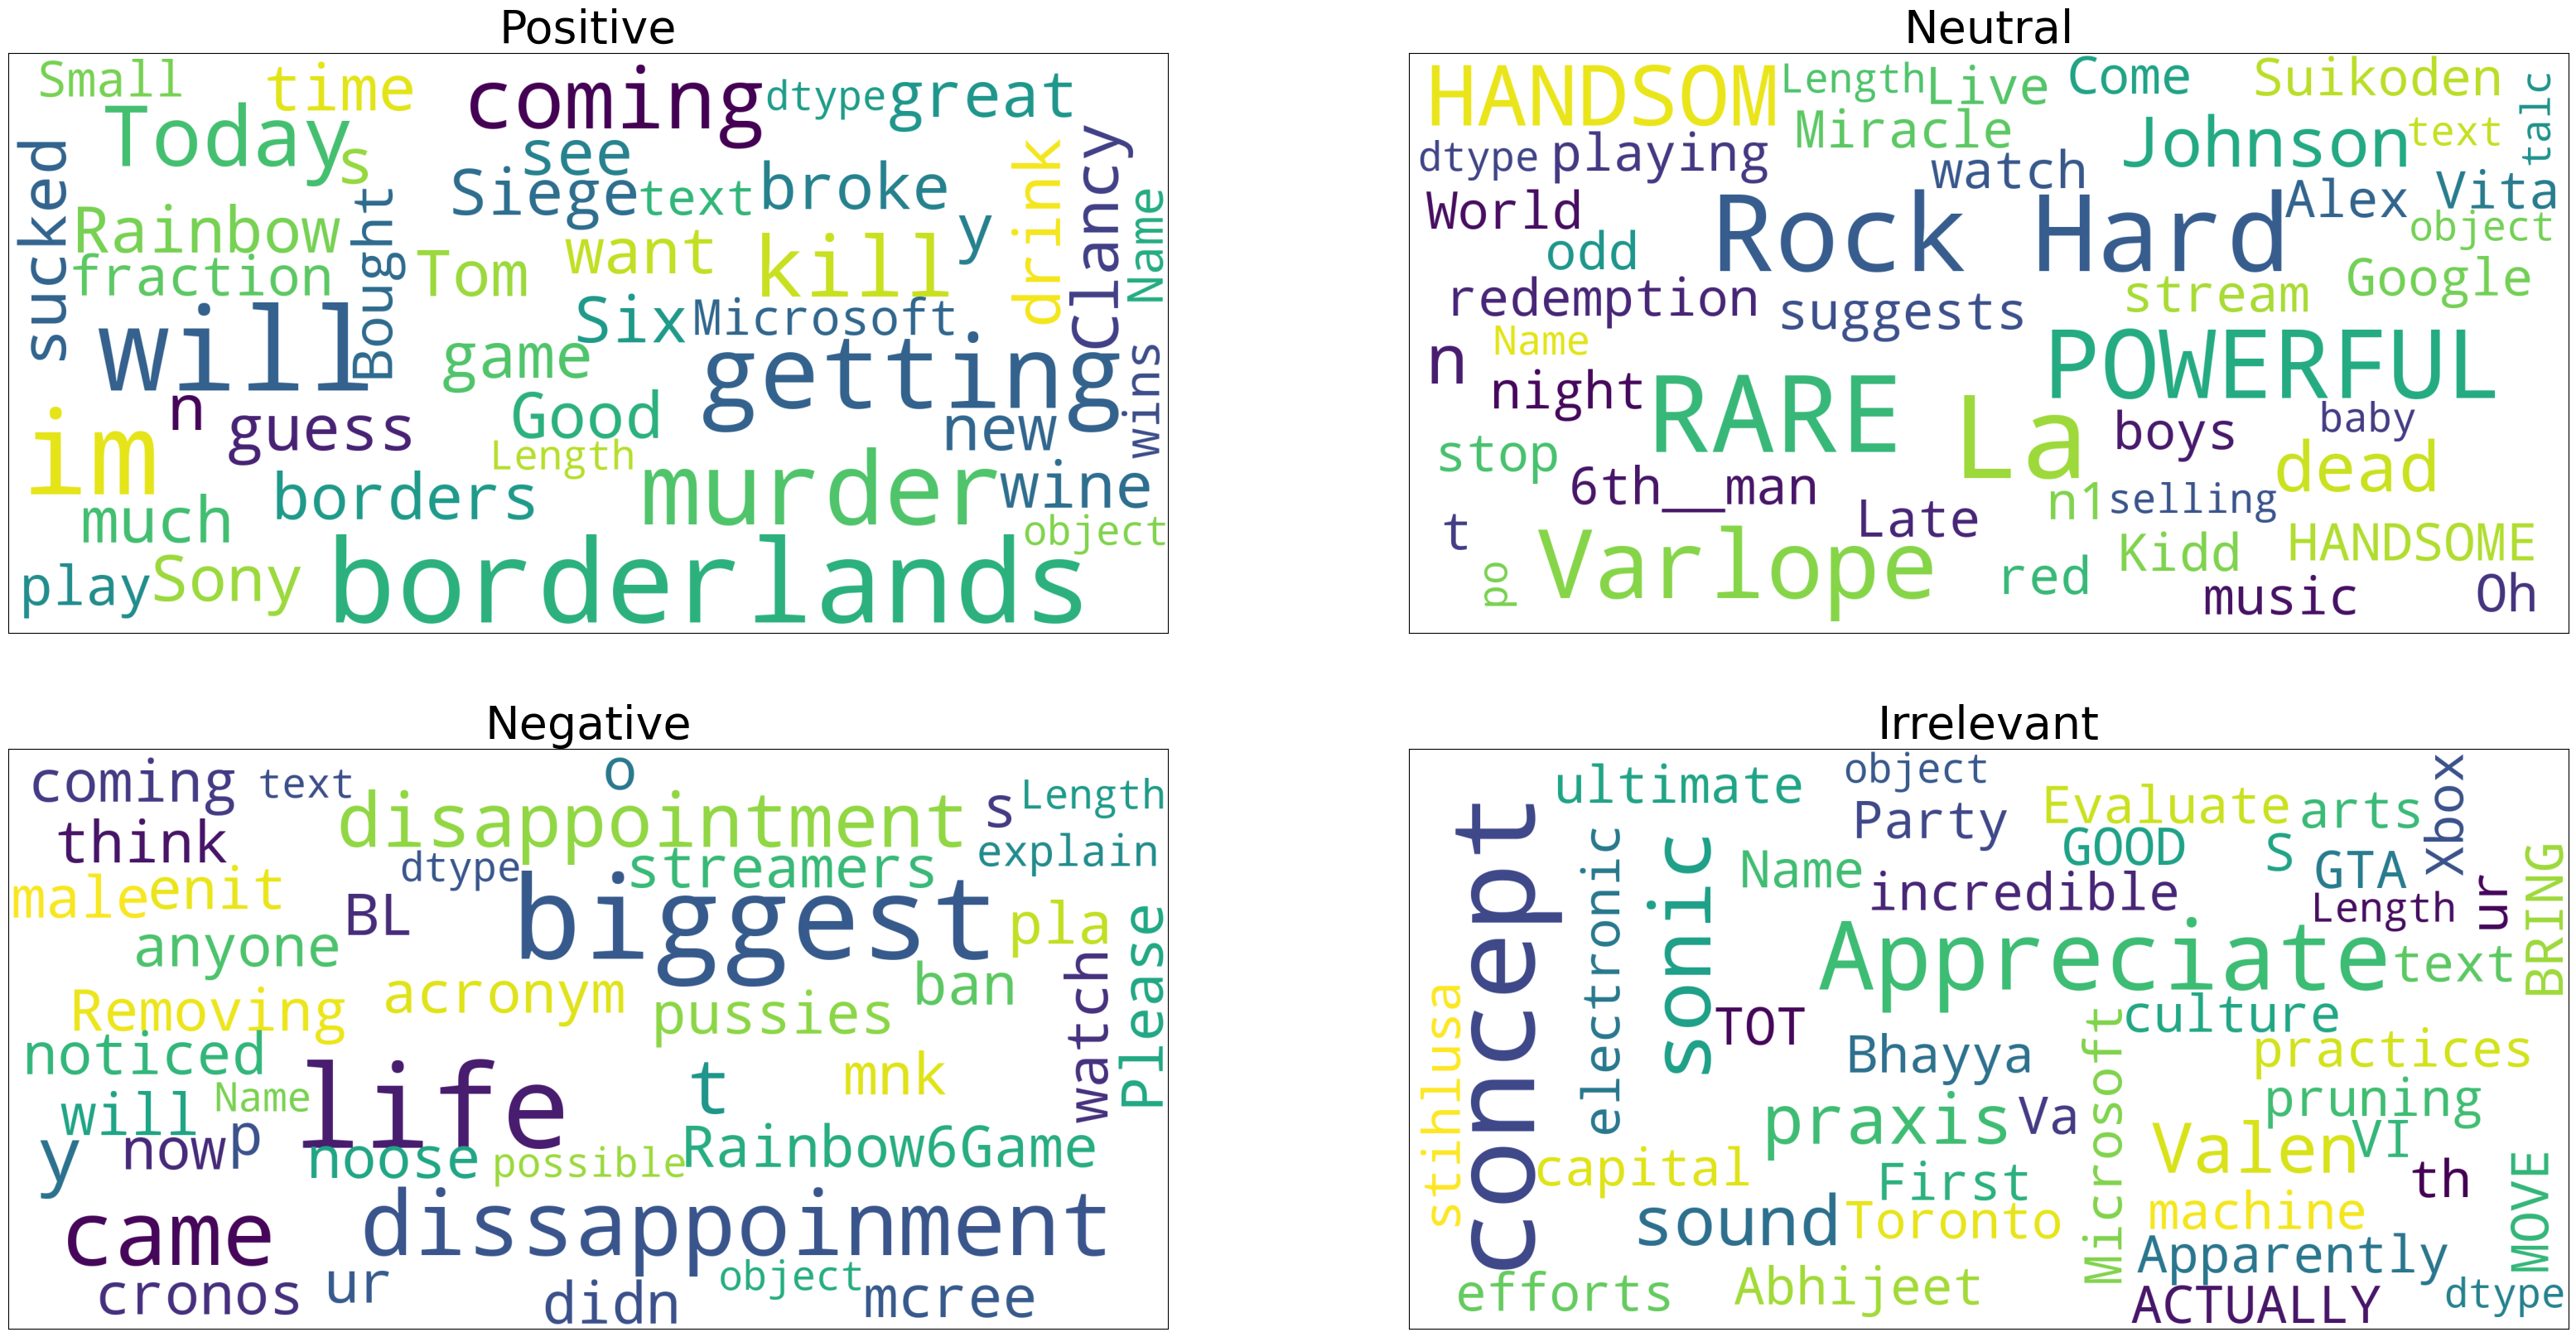

In [20]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2, 2, index+1)

    data = df[df['sentiment'] == sent]['text']
    wordcloud = WordCloud(background_color='white', stopwords=stopwods, 
                      max_words=300, max_font_size=40, scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize = 40)

### Data Cleaning

In [21]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

/opt/anaconda3/lib/python3.10/site-packages/preprocess_kgptalkie/utils.py:97: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=0)

In [23]:
X_train.shape, X_test.shape

((58305,), (14577,))

### Model Building and Testing

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [38]:
clf = Pipeline([('Tfidf', TfidfVectorizer(stop_words=stopwods)), 
                ('rfc', SVC())])

In [39]:
clf.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('Tfidf',
                 TfidfVectorizer(stop_words=["won't", "aren't", 'did', 'by',
                                             "shouldn't", "we'll", 'hers',
                                             'other', "we'd", "he's", "they'll",
                                             'more', 'she', 'above', 'been',
                                             'ours', 'themselves', 'to', 'why',
                                             "we're", "doesn't", 'else', 'k',
                                             'until', 'most', "you've", 'their',
                                             'he', "what's", "you're", ...])),
                ('rfc', SVC())])

## Evaluation

In [40]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.95      0.90      0.92      2487
    Negative       0.95      0.95      0.95      4517
     Neutral       0.92      0.93      0.93      3581
    Positive       0.92      0.94      0.93      3992

    accuracy                           0.93     14577
   macro avg       0.94      0.93      0.93     14577
weighted avg       0.93      0.93      0.93     14577



In [56]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

## Testing

In [41]:
clf.predict(["we are delegent enought to understand the excegency so credit facilities to sme"])

array(['Negative'], dtype=object)

In [42]:
clf.predict(["exhausted and still so much to do #BurnedOut"])

array(['Negative'], dtype=object)

In [49]:
clf.predict(["i like stealing people money"])

array(['Irrelevant'], dtype=object)

In [50]:
clf.predict(["Jyoti loves her daughter 'Kaju' "])

array(['Irrelevant'], dtype=object)

In [51]:
clf.predict(["he is killed in action"])

array(['Neutral'], dtype=object)

In [52]:
clf.predict(['This book is so interesting it made me happy'])

array(['Positive'], dtype=object)

In [53]:
clf.predict(['I am really glad to see you'])

array(['Positive'], dtype=object)

In [54]:
clf.predict(['how the hell are we into halloween month already'])

array(['Irrelevant'], dtype=object)

In [55]:
clf.predict(['i have done nothing but play borderland'])

array(['Negative'], dtype=object)